<a href="https://colab.research.google.com/github/MiaKuntz/machine_learning_2/blob/main/ML4BI_E6_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for week 5

In this exercise, you'll expand on last weeks exercise by adding pre-trained models to the mix. In particular, you'll work with ResNet50, a powerful pre-trained model.

Here is the task: Try a ResNet50 with data augmentation on the cifar10 dataset.

Two tips:



1.   Remember to turn on the GPU. Don't let it stand idle. Whenever you need to take a break, remember to switch it off.
2.   When preprocessing the model, do this to avoid errors

```
# Apply the preprocess_input function
x = Lambda(preprocess_input)(x)
```

This allows arbitrary expressions to be inserted into Keras models.





## Using a pre-trained ResNet50 model

**Load libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Lambda, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import preprocess_input



**Load data**

In [ ]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 3s 0us/step


**Model building**

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

In [ ]:
# Make sure you define the 'base_model' after the augmentation and normalization
# Ensure the 'input_tensor' argument in ResNet50 is replaced with 'input_shape'
# if you are defining 'x' as the output of previous layers
base_model = keras.applications.ResNet50(include_top=False,
                                         weights='imagenet',
                                         input_shape=(32, 32, 3))
base_model.trainable = False

# Define the input tensor for your model
input_tensor = Input(shape=(32, 32, 3))

# Apply data augmentation to the inputs
x = data_augmentation(input_tensor)

# Apply the preprocess_input function
x = Lambda(preprocess_input)(x)

# Add custom layers on top of the base model
x = base_model(x)
x = GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_tensor, outputs=predictions)

94765736/94765736 [==============================] - 1s 0us/step


**Compile**

In [ ]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])


**Train**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="resnet50.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=256,
                    validation_split=0.2,  # Use 20% of the data for validation
                    callbacks=callbacks,  # Include the callbacks in training
                    verbose=1)

Epoch 1/40
157/157 [==============================] - 16s 47ms/step - loss: 1.8180 - accuracy: 0.4125 - val_loss: 1.1755 - val_accuracy: 0.5904
Epoch 2/40
157/157 [==============================] - 5s 34ms/step - loss: 1.4185 - accuracy: 0.5030 - val_loss: 1.1073 - val_accuracy: 0.6140
Epoch 3/40
157/157 [==============================] - 5s 33ms/step - loss: 1.3496 - accuracy: 0.5228 - val_loss: 1.0833 - val_accuracy: 0.6230
Epoch 4/40
157/157 [==============================] - 6s 36ms/step - loss: 1.3109 - accuracy: 0.5396 - val_loss: 1.0695 - val_accuracy: 0.6274
Epoch 5/40
157/157 [==============================] - 5s 32ms/step - loss: 1.2799 - accuracy: 0.5487 - val_loss: 1.0464 - val_accuracy: 0.6324
Epoch 6/40
157/157 [==============================] - 5s 32ms/step - loss: 1.2584 - accuracy: 0.5590 - val_loss: 1.0293 - val_accuracy: 0.6420
Epoch 7/40
157/157 [==============================] - 4s 27ms/step - loss: 1.2363 - accuracy: 0.5666 - val_loss: 1.0414 - val_accuracy: 0.640

**Plot training and validation curves**

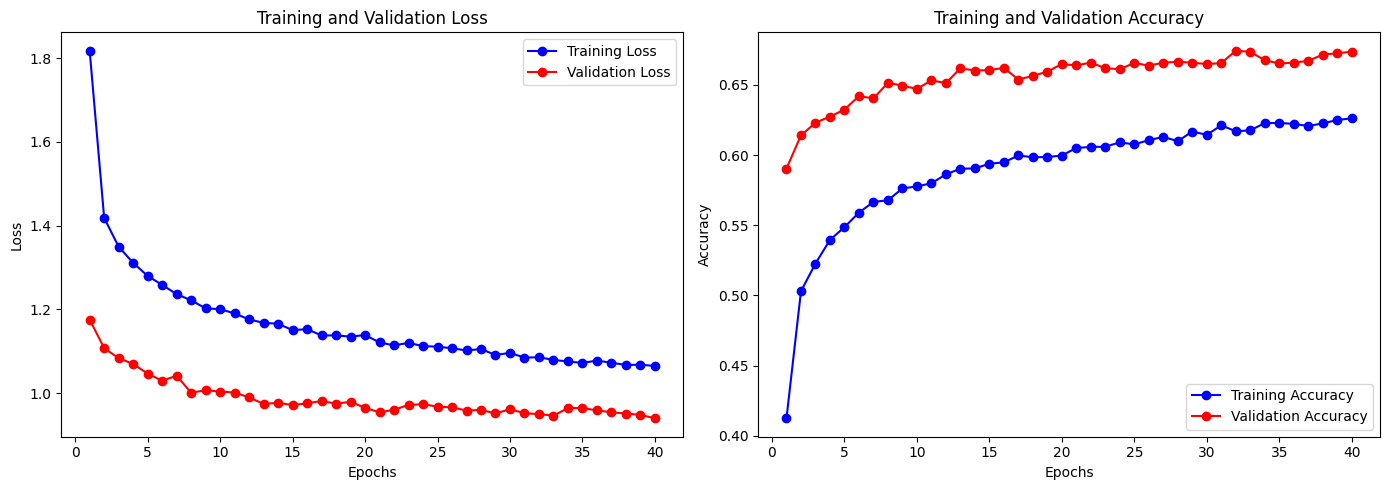

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'history' is the return value from model.fit()
history_dict = history.history

# Extracting loss and accuracy history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()

In [ ]:
def print_best_val_loss_and_accuracy(history):
    history_dict = history.history

    # Find the index of the best validation loss
    best_val_loss_index = np.argmin(history_dict['val_loss'])

    # Retrieve the best validation loss
    best_val_loss = history_dict['val_loss'][best_val_loss_index]

    # Retrieve the validation accuracy corresponding to the best validation loss
    best_val_accuracy = history_dict['val_accuracy'][best_val_loss_index]

    print(f"Best Validation Loss: {best_val_loss}")
    print(f"Validation Accuracy at Best Loss: {best_val_accuracy}")

In [ ]:
print_best_val_loss_and_accuracy(history)

Best Validation Loss: 0.9394710659980774
Validation Accuracy at Best Loss: 0.6736000180244446


In [ ]:
best_model = keras.models.load_model("resnet50.keras", safe_mode=False)

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 5s 8ms/step - loss: 0.9552 - accuracy: 0.6668
Test accuracy: 0.6668000221252441


**Fine-tuning a pre-trained ResNet50**

We we not able to beat a from-scratch approach using the frozen ResNet50. Let's unfreeze the last layer to see if it helps.

In [ ]:
base_model = keras.applications.ResNet50(include_top=False,
                                         weights='imagenet',
                                         input_shape=(32, 32, 3))
base_model.trainable = False
# To unfreeze the last layer, we set its 'trainable' attribute to True
base_model.layers[-1].trainable = True

# Define the input tensor for your model
input_tensor = Input(shape=(32, 32, 3))

# Apply data augmentation to the inputs
x = data_augmentation(input_tensor)

# Apply the preprocess_input function
x = Lambda(preprocess_input)(x)

# Add custom layers on top of the base model
x = base_model(x)
x = GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_tensor, outputs=predictions)

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="resnet50_finetune.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=256,
                    validation_split=0.2,  # Use 20% of the data for validation
                    callbacks=callbacks,  # Include the callbacks in training
                    verbose=1)

Epoch 1/100
157/157 [==============================] - 5s 34ms/step - loss: 1.3056 - accuracy: 0.5383 - val_loss: 1.0576 - val_accuracy: 0.6325
Epoch 2/100
157/157 [==============================] - 5s 32ms/step - loss: 1.2787 - accuracy: 0.5502 - val_loss: 1.0358 - val_accuracy: 0.6434
Epoch 3/100
157/157 [==============================] - 4s 28ms/step - loss: 1.2532 - accuracy: 0.5619 - val_loss: 1.0373 - val_accuracy: 0.6415
Epoch 4/100
157/157 [==============================] - 5s 34ms/step - loss: 1.2398 - accuracy: 0.5648 - val_loss: 1.0227 - val_accuracy: 0.6424
Epoch 5/100
157/157 [==============================] - 5s 35ms/step - loss: 1.2183 - accuracy: 0.5723 - val_loss: 1.0179 - val_accuracy: 0.6463
Epoch 6/100
157/157 [==============================] - 7s 42ms/step - loss: 1.2041 - accuracy: 0.5755 - val_loss: 1.0028 - val_accuracy: 0.6490
Epoch 7/100
157/157 [==============================] - 5s 32ms/step - loss: 1.1883 - accuracy: 0.5822 - val_loss: 0.9980 - val_accuracy:

In [ ]:
print_best_val_loss_and_accuracy(history)

Best Validation Loss: 0.9358782172203064
Validation Accuracy at Best Loss: 0.6754000186920166


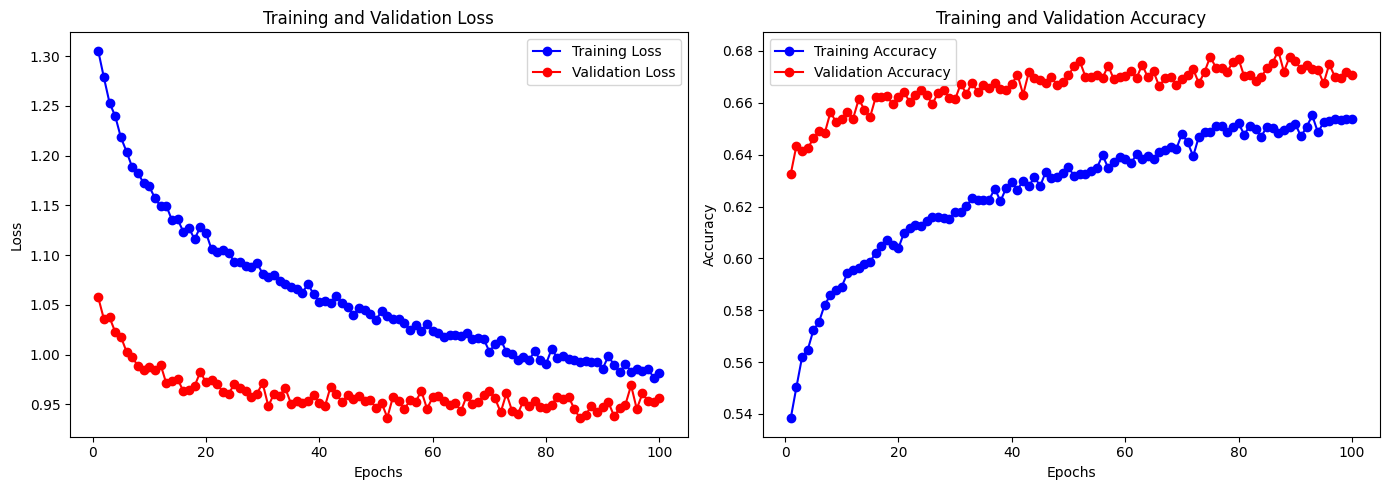

In [ ]:
# Assuming 'history' is the return value from model.fit()
history_dict = history.history

# Extracting loss and accuracy history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()

In [ ]:
best_model = keras.models.load_model("resnet50_finetune.keras", safe_mode=False)

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 5s 8ms/step - loss: 0.9519 - accuracy: 0.6674
Test accuracy: 0.6674000024795532


**Conclusion**

We were not able to beat the from-scratch approach despite having adjusted the weights in the last layer and running for twice the number of epochs. What are the ways forward? Here are a couple of suggestions:

*   **Unfreeze more layers**. Fine-tuning more layers may allow the pretrained network to better adapt to the specifics of the dataset.

*   **Advanced Data Augmentation**: Explore more sophisticated data augmentation techniques. Sometimes, introducing variations in the augmentation can help the model generalize better.

*   **Try a different pre-trained model**. The problem might be ResNet50 itself. Keras includes many different pre-trained models. See here for a [list](https://keras.io/api/applications/).




